In [105]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [52]:
df_car = pd.read_csv("cars-dataset.csv")

In [53]:
df_car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [54]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [55]:
df_car.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [56]:
df_car.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [57]:
#Removing non-numeric columns
df_car = df_car.drop(['car name','hp'], axis=1)

In [58]:
df_car.head()

,cyl,disp,wt,acc,yr,mpg
0,8,307.0,3504,12.0,70,18.0
1,8,350.0,3693,11.5,70,15.0
2,8,318.0,3436,11.0,70,18.0
3,8,304.0,3433,12.0,70,16.0
4,8,302.0,3449,10.5,70,17.0


# Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points



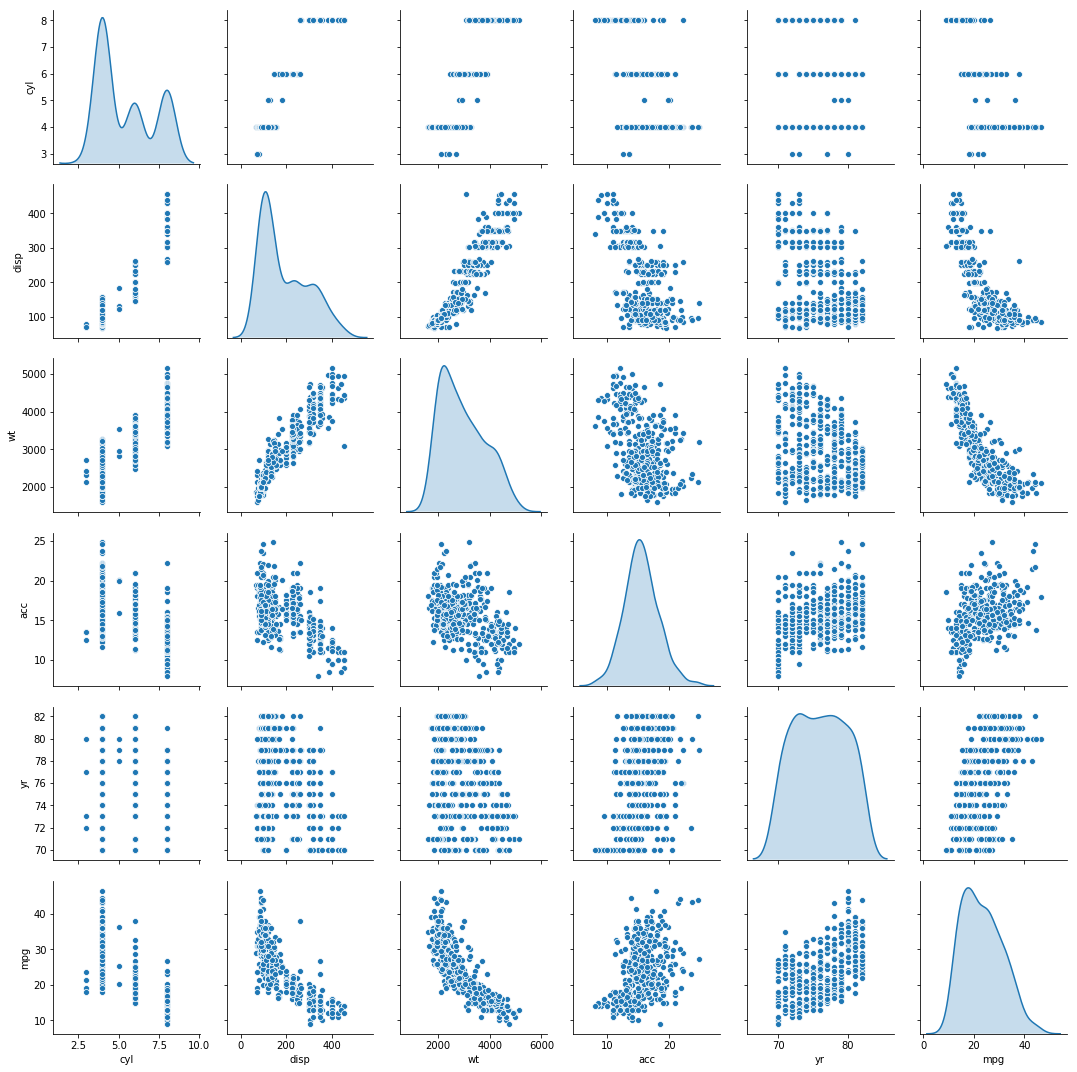

In [59]:
sns.pairplot(df_car,diag_kind='kde')

Based on number of gaussians:
'cyl' may have 3 clusters
'disp' may have 3 clusters but not very distinct
'wt', 'yr','mpg' seems to have 2 clusters each but with huge overlap

# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters 

In [60]:
from scipy.stats import zscore

df_car_z = df_car.apply(zscore)

In [62]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_car_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  





In [63]:

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2388.000000
1,2,1133.590669
2,3,853.439850
3,4,650.302416
4,5,589.912239
5,6,523.383802
6,7,473.274207
7,8,434.723558
8,9,392.015445


Text(0, 0.5, 'Cluster errors')

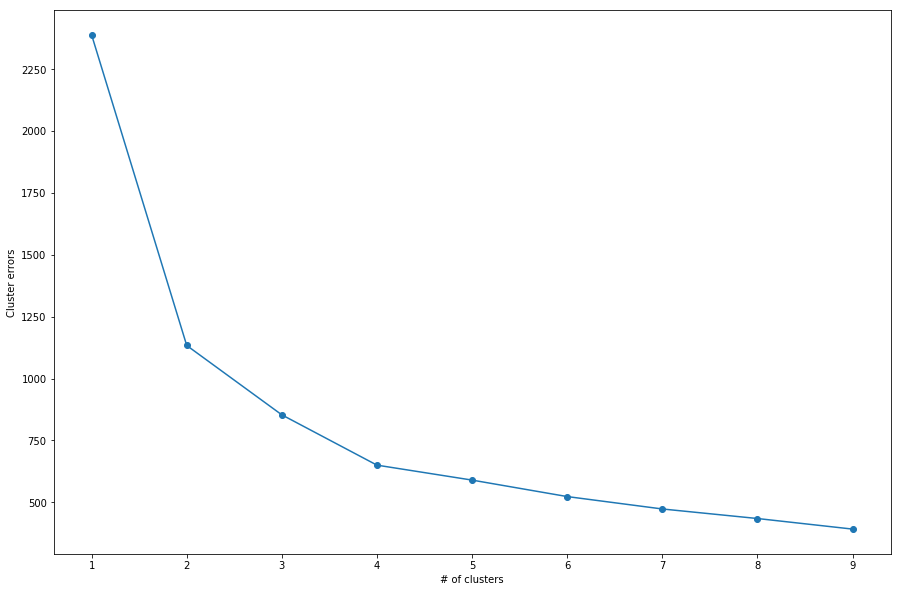

In [64]:
# Elbow plot

plt.figure(figsize=(15,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('# of clusters')
plt.ylabel('Cluster errors')

Optimal number of clusters is 4

In [83]:
# Number of clusters
kmeans = KMeans(n_clusters=4)

# Fitting the input data
kmeans = kmeans.fit(df_car_z)

# Getting the cluster labels
labels = kmeans.predict(df_car_z)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

print("labels")
print(labels)

Centroid values
sklearn
[[ 1.49819126e+00  1.50392292e+00  1.40409797e+00 -1.08614860e+00
  -6.88323847e-01 -1.16379715e+00  1.00000000e+00]
 [-8.62206851e-01 -8.15170802e-01 -7.64000966e-01  3.24196613e-01
  -6.30940655e-01  2.11554379e-01  3.88578059e-16]
 [-7.67284409e-01 -7.51879764e-01 -7.36744946e-01  3.12727592e-01
   1.11682307e+00  1.13502902e+00  4.16333634e-16]
 [ 4.31735900e-01  3.48494321e-01  3.77500418e-01  3.81926158e-01
  -6.00639725e-02 -5.50905405e-01  3.33066907e-16]]
labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 1 1 1 1 1 1 3 0 0 0 0 1 1 1 1 3 3 3 3
 3 0 0 0 0 0 0 0 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 1 0 0 0 0 3 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 3 0 3 3 3 3 1 1 1 1 3 3 3 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 0 0 0 0 3 3 3 3 3 3 0 1 1 3 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 3 3 3 3 1 1 1 2 3 3 3 3 1 1 1 1 1 0 1 3 3 0 0 0 0 2 2 2 1 2 0
 3 0 0 3 3 3 3 0 0 0 0 2 1 1 1 2 2 2 2 3 1 1 2 2 2

In [84]:
prediction= kmeans.predict(df_car_z)



In [85]:
df_car_pred = pd.DataFrame(df_car_z)


In [86]:
df_car_pred.head()

,cyl,disp,wt,acc,yr,mpg,group
0,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.834543,1


In [87]:
df_car_pred["group"] = prediction

In [88]:
df_car_pred.head()

,cyl,disp,wt,acc,yr,mpg,group
0,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.706439,0
1,1.498191,1.503514,0.854333,-1.477038,-1.627426,-1.090751,0
2,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.706439,0
3,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.962647,0
4,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.834543,0


In [89]:
df_car_pred.groupby("group").count()

,cyl,disp,wt,acc,yr,mpg
group,,,,,,
0,94,94,94,94,94,94
1,100,100,100,100,100,100
2,119,119,119,119,119,119
3,85,85,85,85,85,85


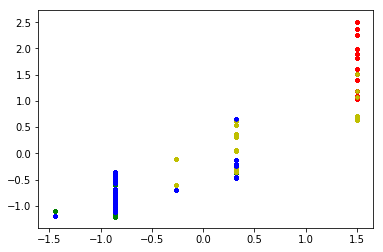

In [91]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(df_car_pred.loc[df_car_pred['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

In [96]:
df_car_pred_0 = df_car_pred.loc[df_car_pred["group"] == 0]
df_car_pred_1 = df_car_pred.loc[df_car_pred["group"] == 1]
df_car_pred_2 = df_car_pred.loc[df_car_pred["group"] == 2]
df_car_pred_3 = df_car_pred.loc[df_car_pred["group"] == 3]

# for i in labels:
#     df_car_pred_[i] = df_car_pred.loc[df_car_pred["group"] == i]

# Use linear regression model on different clusters separately and print the coefficients of the models individually

In [102]:
x0=df_car_pred_0.drop(["mpg"], axis=1)
y0=df_car_pred_0["mpg"]

x1=df_car_pred_1.drop(["mpg"], axis=1)
y1=df_car_pred_1["mpg"]

x2=df_car_pred_2.drop(["mpg"], axis=1)
y2=df_car_pred_2["mpg"]

x3=df_car_pred_3.drop(["mpg"], axis=1)
y3=df_car_pred_3["mpg"]

In [111]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.30, random_state=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=1)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30, random_state=1)

In [112]:
regression_model0 = LinearRegression()
regression_model0.fit(x0_train, y0_train)

regression_model1 = LinearRegression()
regression_model1.fit(x1_train, y1_train)

regression_model2 = LinearRegression()
regression_model2.fit(x2_train, y2_train)

regression_model3 = LinearRegression()
regression_model3.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
# Train R^2
print(regression_model0.score(x0_train, y0_train))
print(regression_model1.score(x1_train, y1_train))
print(regression_model2.score(x2_train, y2_train))
print(regression_model3.score(x3_train, y3_train))

0.5735485384513298
0.5939787105213976
0.5699050671357888
0.3060820142305819


In [114]:
# Test R^2
print(regression_model0.score(x0_test, y0_test))
print(regression_model1.score(x1_test, y1_test))
print(regression_model2.score(x2_test, y2_test))
print(regression_model3.score(x3_test, y3_test))

0.4531557611657201
0.4618746159545484
0.4078122332084285
0.2677182424367588


In [115]:
# Evaluate using Cross Validation
from sklearn import model_selection
# seed = 6
kfold = model_selection.KFold(n_splits=10, random_state=1)
model = LinearRegression()

results = model_selection.cross_val_score(model, x0, y0, scoring='r2', cv=kfold)
print("R square: %.3f (%.3f)" % (-results.mean(), results.std()))

R square: 0.369 (0.810)


In [118]:
y0_pred = regression_model0.predict(x0_test)

In [119]:
from sklearn import metrics

In [120]:
metrics.r2_score(y0_test, y0_pred)

0.4531557611657201